# **Price Elasticity Supermarket Dataset**

In [1536]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Planning

The Data Periode is from 2020-07-01	to 2023-06-30

> Notes : We will ignore the covid 19 event in this analysis

Our Main Question : `Can we know for each product the best price we can put to get the maximum profit?`

How we will do?
- Create a model that predict quantity based on Price, Discount (Yes/No), Item Name, Category Name for each product, and Date (Month and days of week) 
    *I exclude year because it will not general well for future
- Quantity will be separated by 3 part, Quantile 0.25, Median and Quantile 0.75 we do this to imagine worst case to best case.
- Show each product which price point is the best to get profit and revenue

The result?
- A model that we can use to see the best profit for each product price per each scenario 
- User can choose a day and month to see the best price to get most profit

In [1537]:
df1 = pd.read_csv('Dataset/annex1.csv')
df1

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables
...,...,...,...,...
246,106958851400125,Haixian Mushroom (Bag) (4),1011010801,Edible Mushroom
247,106971533450003,Haixian Mushroom (Bunch),1011010801,Edible Mushroom
248,106971533455008,Haixian Mushroom (Bag) (3),1011010801,Edible Mushroom
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),1011010801,Edible Mushroom


In [1510]:
df2 = pd.read_csv('Dataset/annex2.csv')
df2

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No
...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,sale,No
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,sale,No
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,sale,No
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,sale,No


In [1511]:
df3 = pd.read_csv('Dataset/annex3.csv')
df3

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03
...,...,...,...
55977,2023-06-30,102900051000944,18.00
55978,2023-06-30,102900051004294,6.45
55979,2023-06-30,102900051010455,4.48
55980,2023-06-30,106949711300259,1.45


In [1512]:
df4 = pd.read_csv('Dataset/annex4.csv')
df4

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78
...,...,...,...
246,106971533455008,Haixian Mushroom (Bag) (3),1.30
247,106971563780002,Xianzongye (Bag) (2),0.00
248,106972776821582,Xianzongye (Bag) (3),9.43
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),11.13


Merge all dataset become 1

In [1513]:
df = df2.merge(df1[['Item Code','Item Name','Category Name']],on='Item Code',how='left')
df = df.merge(df3,on=['Date','Item Code'],how='left')
df = df.merge(df4[['Item Code','Loss Rate (%)']],on=['Item Code'],how='left')
df

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,Flower/Leaf Vegetables,2.10,22.27
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,Flower/Leaf Vegetables,7.03,14.43
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,Flower/Leaf Vegetables,4.60,13.70
...,...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,sale,No,Xixia Black Mushroom (1),Edible Mushroom,15.60,10.80
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,sale,No,Changxianqie,Solanum,7.00,6.90
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,sale,No,Xixia Black Mushroom (1),Edible Mushroom,15.60,10.80
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,sale,No,Wuhu Green Pepper (1),Capsicum,3.63,5.70


In [1514]:
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['Date'].dt.day_of_week
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Year/Month'] = df['Date'].dt.strftime(r'%y/%m')
df['Revenue'] = df['Quantity Sold (kilo)']*df['Unit Selling Price (RMB/kg)']
df.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Name,Wholesale Price (RMB/kg),Loss Rate (%),day_of_week,Month,Year,Year/Month,Revenue
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08,2,7,2020,20/07,3.0096
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,Flower/Leaf Vegetables,2.10,22.27,2,7,2020,20/07,2.7168
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08,2,7,2020,20/07,3.1084
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,Flower/Leaf Vegetables,7.03,14.43,2,7,2020,20/07,4.2100
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,Flower/Leaf Vegetables,4.60,13.70,2,7,2020,20/07,4.3120


In [1515]:
df[df['Item Code']==102900005117056].groupby(['Year','Month'])['Unit Selling Price (RMB/kg)'].unique().reset_index()

,Year,Month,Unit Selling Price (RMB/kg)
0,2020,7,"[7.6, 8.0, 10.0, 9.0, 9.2, 9.1, 8.4, 8.9, 9.3,..."
1,2020,8,"[9.0, 7.9, 8.0, 10.0, 7.6, 6.0]"
2,2020,9,"[6.0, 8.0, 10.0, 12.0, 7.0, 11.0, 9.0]"
3,2020,10,"[8.0, 9.0, 10.0, 7.6]"
4,2020,11,"[7.0, 6.0, 6.6]"
5,2020,12,"[6.6, 7.0, 7.6, 9.0, 10.0, 12.0, 13.0, 14.0, 1..."
6,2021,1,"[18.0, 16.0, 14.0, 17.0, 19.8, 21.8]"
7,2021,2,"[14.0, 13.0, 11.0, 12.0]"
8,2022,2,[12.0]


# **Cleaning Data**

In [1516]:
def check_duplicate(df):
    if df.duplicated().sum() > 0:
        total_duplicated = df.duplicated().sum()
        total_percentage_duplicated = round(total_duplicated / df.shape[0] * 100, 2)
        original_data = df.shape[0]
        print(f'Total Duplicated Data: {total_duplicated} rows ({total_percentage_duplicated}% of overall data)')
        duplicated_rows = df[df.duplicated()]
        display(duplicated_rows)

        if total_percentage_duplicated < 1:
            user_input = input("Do you want to delete the duplicated data? (yes/no): ").strip().lower()
            if user_input in ("yes", "y"):
                df.drop_duplicates(inplace=True)
                after_data = df.shape[0]
                print(f'Duplicated data successfully deleted. Total deleted: {original_data - after_data}')
            else:
                print("No action taken. Duplicated data was not deleted.")
        else:
            print("Duplicated data is more than 1% of the dataset. Please check manually.")
        return duplicated_rows.index
    else:
        print("No duplicated data found.")
        return None
duplicated_index = check_duplicate(df)


No duplicated data found.


In [1517]:
def check_data_summary(df):
    # Create DataFrame for NaN summary
    nan_summary = pd.DataFrame({
        'Total NaN': df.isna().sum(),
        'Percentage NaN': round(df.isna().sum() / df.shape[0] * 100, 2),
        'Non-Null Count': df.notnull().sum(),
        'Data Type': df.dtypes
    })

    nan_summary = nan_summary.reset_index().rename(columns={'index': 'Column Name'})
    nan_df = nan_summary.sort_values(by='Percentage NaN', ascending=False)
    print('=============== Data Summary ===============')
    display(nan_df)
    return nan_df

nan = check_data_summary(df)

=============== Data Summary ===============


,Column Name,Total NaN,Percentage NaN,Non-Null Count,Data Type
0,Date,0,0.0,878503,datetime64[ns]
1,Time,0,0.0,878503,object
2,Item Code,0,0.0,878503,int64
3,Quantity Sold (kilo),0,0.0,878503,float64
4,Unit Selling Price (RMB/kg),0,0.0,878503,float64
5,Sale or Return,0,0.0,878503,object
6,Discount (Yes/No),0,0.0,878503,object
7,Item Name,0,0.0,878503,object
8,Category Name,0,0.0,878503,object
9,Wholesale Price (RMB/kg),0,0.0,878503,float64


In [1518]:
# Show how much NaN in each column
def check_NaN_total(df):
    percentage_nan = pd.DataFrame({
    'Total NaN': df.isna().sum(),
    'Percentage' : round(df.isna().sum()/df.shape[0]*100)
    })
    print('=============== Total NaN in each column ===============')
    display(percentage_nan.sort_values(by='Percentage',ascending=False))

check_NaN_total(df)

=============== Total NaN in each column ===============


,Total NaN,Percentage
Date,0,0.0
Time,0,0.0
Item Code,0,0.0
Quantity Sold (kilo),0,0.0
Unit Selling Price (RMB/kg),0,0.0
Sale or Return,0,0.0
Discount (Yes/No),0,0.0
Item Name,0,0.0
Category Name,0,0.0
Wholesale Price (RMB/kg),0,0.0


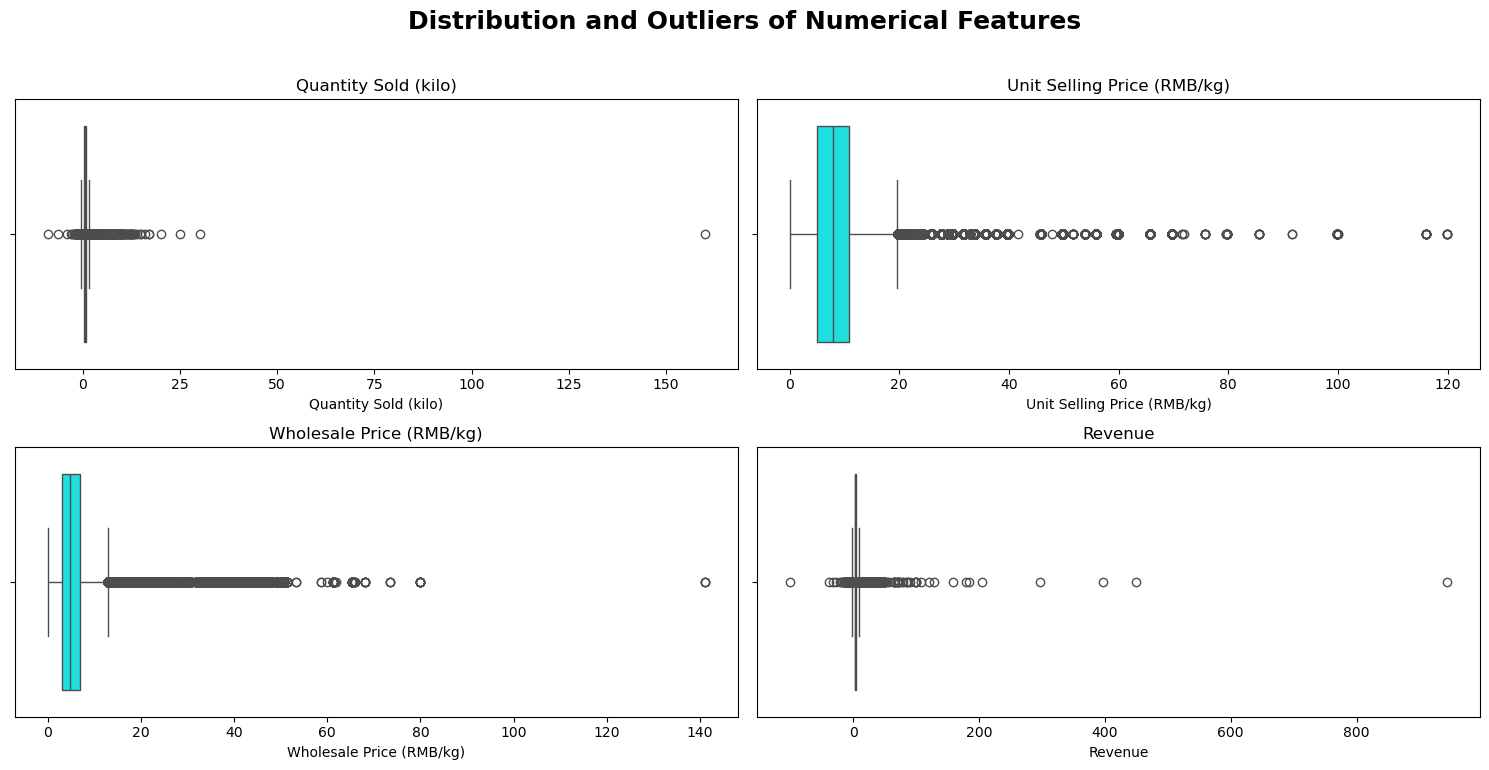

In [1519]:
def plot_numerical_boxplots(df, drop_cols=None, num_cols=5, figsize=(15, 7.5), title='Distribution and Outliers of Numerical Features'):
    """
    Plots boxplots of numerical features from a DataFrame.

    Parameters:
    - df: DataFrame
    - drop_cols: List of columns to drop before selecting numerical columns
    - num_cols: Number of plots per row
    - figsize: Size of the full figure
    - title: Title for the full plot
    """
    if drop_cols is None:
        drop_cols = []

    # Select numerical columns
    numerical_cols = df.drop(columns=drop_cols).select_dtypes(include=['number']).columns
    num_rows = int(np.ceil(len(numerical_cols) / num_cols))

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.boxplot(data=df, x=col, ax=axes[i], color='cyan')
        axes[i].set_title(col, fontsize=12)

    # Turn off any empty subplots
    for ax in axes[len(numerical_cols):]:
        ax.axis('off')

    # Add a big title
    fig.suptitle(title, fontsize=18, fontweight='bold', y=1.02)
    
    plt.tight_layout()
    plt.show()
    
plot_numerical_boxplots(df, drop_cols=['Date','Time','Item Code','Loss Rate (%)','day_of_week','Month','Year','Year/Month'], num_cols=2)


### Quantity Sold

We will drop this because the quantity is extreme

In [1520]:
df[df['Quantity Sold (kilo)']>50]

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Name,Wholesale Price (RMB/kg),Loss Rate (%),day_of_week,Month,Year,Year/Month,Revenue
579907,2022-06-09,09:31:57.045,102900011034354,160.0,5.9,sale,No,Xianzongye (Bag) (1),Flower/Leaf Vegetables,3.27,0.0,3,6,2022,22/06,944.0


In [1521]:
df.drop(df[df['Quantity Sold (kilo)']>50].index,inplace=True)

## **Feature Enginering**

### Adjusted Profit

$$
\text{Total Profit} = \text{Quantity} \times \left( \text{Unit Selling Price} - \frac{\text{Wholesale Price}}{1 - \text{Loss Rate}} \right)
$$

With this formula we can calculate the real cost of one product

📉 Example

The higher the loss rate, the more each surviving unit must "carry" the total cost burden — and your profit shrinks unless you raise prices.

| Loss Rate | Sellable % | Adjusted Cost (`5.65 / (1 - loss)`) |
| --------- | ---------- | ----------------------------------- |
| 0%        | 100%       | 5.65 RMB/kg                         |
| 10%       | 90%        | 6.28 RMB/kg                         |
| 20%       | 80%        | 7.06 RMB/kg                         |
| 29%       | 71%        | 7.96 RMB/kg                         |
| 50%       | 50%        | 11.30 RMB/kg                        |
| 70%       | 30%        | 18.83 RMB/kg                        |


In [1522]:
loss_rate = 29/100
sell_price = 10
wholesale = 5.65

# The higher loss rate, the bigger adjusted cost. This calculate the real cost of how much the product priced after loss
adjusted_cost = wholesale / 1-(loss_rate)
profit_per_kg = 10 - adjusted_cost
predicted_quantity_sold = 0.251
total_profit = profit_per_kg * predicted_quantity_sold
total_profit

1.16464

In [1523]:
df['Adjusted_profit'] = df['Quantity Sold (kilo)']*(df['Wholesale Price (RMB/kg)']/(1-(df['Loss Rate (%)']/100)))
df.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Name,Wholesale Price (RMB/kg),Loss Rate (%),day_of_week,Month,Year,Year/Month,Revenue,Adjusted_profit
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08,2,7,2020,20/07,3.0096,1.841068
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,Flower/Leaf Vegetables,2.10,22.27,2,7,2020,20/07,2.7168,2.293709
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08,2,7,2020,20/07,3.1084,1.901507
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,Flower/Leaf Vegetables,7.03,14.43,2,7,2020,20/07,4.2100,3.458724
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,Flower/Leaf Vegetables,4.60,13.70,2,7,2020,20/07,4.3120,2.873001


In [1525]:
top_profit = df.groupby('Item Code')[['Adjusted_profit']].sum().sort_values(by='Adjusted_profit',ascending=False).reset_index()
top_profit = top_profit.merge(df1,on='Item Code',how='left')
top_profit['Adjusted_profit'] = round(top_profit['Adjusted_profit'])
top_profit.head()

,Item Code,Adjusted_profit,Item Name,Category Code,Category Name
0,102900005116714,198082.0,Broccoli,1011010201,Cabbage
1,102900005116530,162135.0,Xixia Mushroom (1),1011010801,Edible Mushroom
2,102900005116899,158069.0,Net Lotus Root (1),1011010402,Aquatic Tuberous Vegetables
3,102900011016701,152407.0,Wuhu Green Pepper (1),1011010504,Capsicum
4,102900005115779,94135.0,Yunnan Shengcai,1011010101,Flower/Leaf Vegetables


In [1526]:
import plotly.express as px

# Sort the data by Adjusted_profit descending
sorted_df = top_profit.sort_values('Adjusted_profit', ascending=False).head(10)

fig = px.bar(
    sorted_df,
    x='Adjusted_profit',
    y='Item Name',
    text_auto='.4s',
    color='Category Name',
    title="Top 10 with Most Adjusted Profit",
    category_orders={'Item Name': sorted_df['Item Name'].tolist()}
)

fig.update_yaxes(autorange=True)

# Move legend clearly above the chart
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.5,        # Move legend above the plot
        xanchor="center",
        x=0.5
    )
)

fig.show()


### **Event Flag**

In [1527]:
import plotly.express as px
import plotly.graph_objects as go
df_date = df.groupby('Year/Month')['Revenue'].sum().reset_index()
# Scatter (regression-like) + line plot
fig = go.Figure()

# Add scatter plot (similar to regplot without CI)
fig.add_trace(go.Scatter(
    x=df_date['Year/Month'],
    y=df_date['Revenue'],
    mode='markers',
    name='Data Points',
    marker=dict(color='blue', size=6),
    opacity=0.6
))

# Add trend line (fit using rolling mean or lowess if you want)
fig.add_trace(go.Scatter(
    x=df_date['Year/Month'],
    y=df_date['Revenue'],
    mode='lines',
    name='Revenue Trend',
    line=dict(color='orange', width=2)
))

# Update layout
fig.update_layout(
    title='Monthly Revenue Trend',
    xaxis_title='Year/Month',
    yaxis_title='Revenue',
    # width=1200,
    # height=500,
    template='plotly_white'
)

fig.show()


In [1528]:
df_date_month_year = df.groupby(['Year','Month'])[['Revenue']].count().reset_index()
import plotly.express as px

fig = px.line(
    df_date_month_year,
    x='Month',
    y='Revenue',
    color='Year',   # this creates separate lines by Year
    markers=True,
    title='Monthly Revenue Counts by Year'
)

fig.show()


The trend is always go up in August and New Year

After research I get why :

- January : Lunar New Year on February 2021, February 2022, Jan 2023
- August : Summer Promo
- Oktober : Mid-Autumn Festival

Idea for Model : `Create a flag for event`

Next we will find out which product customer buy

In [ ]:
df['Event'] = "None"

In [1530]:
# Lunar New Year
df.loc[(df['Month']==2)&((df['Year']==2021)|(df['Year']==2022)),'Event']='Lunar New Year'
df.loc[(df['Month']==1)&(df['Year']==2023),'Event']='Lunar New Year'
df[df['Event']=='Lunar New Year']['Year'].unique(),df[df['Event']=='Lunar New Year']['Month'].unique()

(array([2021, 2022, 2023], dtype=int32), array([2, 1], dtype=int32))

In [1531]:
# Summer Promo
df.loc[(df['Month']==8),'Event']='Summer Promo'

# Summer Promo
df.loc[(df['Month']==10),'Event']='Mid-Autumn Festival'

In [1532]:
df['Event'].unique()

array(['None', 'Summer Promo', 'Mid-Autumn Festival', 'Lunar New Year'],
      dtype=object)

## **Event Specific Focus**

We will see which product with the best revenue generated

In [1533]:
def get_top_products_by_profit(df, df1, event_name, top_n=10):
    # Filter data for the specific event and sales
    df_event = df[(df['Event'] == event_name) & (df['Sale or Return'] == 'sale')].copy()

    # Count orders and aggregate revenue
    df_popular = df_event['Item Code'].value_counts().reset_index()
    df_popular.columns = ['Item Code', 'total_order']

    df_revenue = df_event.groupby('Item Code')['Revenue'].sum().reset_index()
    df_revenue['Revenue'] = df_revenue['Revenue'].round()

    # Merge with item details
    df_all = df_popular.merge(df_revenue, on='Item Code', how='left')
    df_all = df_all.merge(df1[['Item Code', 'Item Name', 'Category Name']], on='Item Code', how='left')

    # Calculate net profit
    df_event['Adjusted_cost'] = df_event['Wholesale Price (RMB/kg)'] / (1 - df_event['Loss Rate (%)'] / 100)
    df_event['net_profit'] = df_event['Quantity Sold (kilo)'] * (
        df_event['Unit Selling Price (RMB/kg)'] - df_event['Adjusted_cost']
    )

    df_profit = df_event.groupby('Item Code')['net_profit'].sum().reset_index()
    df_profit['net_profit'] = df_profit['net_profit'].round()

    # Final merge
    df_final = df_all.merge(df_profit, on='Item Code', how='left')
    df_final = df_final[['Item Name', 'Category Name', 'total_order', 'Revenue', 'net_profit']]
    df_final = df_final.sort_values(by='net_profit', ascending=False).head(top_n)
    import plotly.express as px
    fig = px.bar(
        df_final.head(10),
        x='net_profit',
        y='Item Name',
        color="Category Name",
        text_auto=True,
        title="Top 10 Product with the Best Profit Adjusted in Lunar New Year Period",
        labels={
            'Item Name': 'Product Name',
            'net_profit': 'Total Profit'
        },
            category_orders={'Item Name': df_final['Item Name'].tolist()}  # enforce custom order
)
    fig.show()
    return df_final

df_top_lunar = get_top_products_by_profit(df, df1, "Lunar New Year")

#['None', 'Summer Promo', 'Mid-Autumn Festival', 'Lunar New Year']


# Price Optimization Model

We predict for each year, each product

We will exclude return and not discount

**What is pyGAM?**

pygam is a Python library that helps you build smooth curves through your data using a model called a Generalized Additive Model (GAM).

Imagine you're trying to draw a smooth line that best fits your data points—pygam helps you do that while keeping it flexible and interpretable.

What is usually predicted as a straight line can be made more flexible using GAM.

**🧪 How does ExpectileGAM work?**

Let’s say you want to model how quantity sold depends on price, but you want:

* One curve for the lower bound (25th percentile or expectile)
* One curve for the middle (50th = median)
* One for the upper bound (75th percentile or expectile)


**🧑‍🔬 Analogy:**
Imagine you're trying to draw 3 curves to show:

- Worst-case demand (bottom curve)
- Typical demand (middle curve)
- Best-case demand (top curve)

ExpectileGAM helps you draw these curves in a smooth way, automatically learning the shape from the data.

**What it create?**

After we train the model, the model try to predict for each data point the 3 curve that suit the best.

In [1534]:
df

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Name,Wholesale Price (RMB/kg),Loss Rate (%),day_of_week,Month,Year,Year/Month,Revenue,Adjusted_profit,Event
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08,2,7,2020,20/07,3.0096,1.841068,None
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,Flower/Leaf Vegetables,2.10,22.27,2,7,2020,20/07,2.7168,2.293709,None
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08,2,7,2020,20/07,3.1084,1.901507,None
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,Flower/Leaf Vegetables,7.03,14.43,2,7,2020,20/07,4.2100,3.458724,None
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,Flower/Leaf Vegetables,4.60,13.70,2,7,2020,20/07,4.3120,2.873001,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,sale,No,Xixia Black Mushroom (1),Edible Mushroom,15.60,10.80,4,6,2023,23/06,6.8160,4.966816,None
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,sale,No,Changxianqie,Solanum,7.00,6.90,4,6,2023,23/06,8.0280,5.030075,None
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,sale,No,Xixia Black Mushroom (1),Edible Mushroom,15.60,10.80,4,6,2023,23/06,3.0000,2.186099,None
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,sale,No,Wuhu Green Pepper (1),Capsicum,3.63,5.70,4,6,2023,23/06,1.3104,0.970053,None


In [ ]:
df[(df['Sale or Return']=='sale')&(df['Discount (Yes/No)']=='No')].drop(columns=['Date','Time','Item Code','Sale or Return','Discount (Yes/No)','day_of_week']).to_csv('Dataset/clean_df.csv',index=False)

In [1560]:
year = [2023]
df_filtered = df[(df['Sale or Return']=='sale')&(df['Discount (Yes/No)']=='No')&(df['Year'].isin(year))].copy()

In [1580]:
df_filtered['Item Code'].value_counts().reset_index().tail(15)

,Item Code,count
117,102900011018132,6
118,102900011021675,6
119,102900011008485,6
120,102900011002414,4
121,102900051010790,4
122,102900011030912,3
123,102900011036266,3
124,102900011034538,3
125,102900011034705,3
126,102900011008133,3


In [1586]:
product = 102900011013274
loss_rate_selected = df4.loc[df4['Item Code']==product,'Loss Rate (%)'].iloc[0]
df_selected =  df_filtered[df_filtered['Item Code']==product][['Quantity Sold (kilo)','Unit Selling Price (RMB/kg)', 'Item Name', 'Category Name', 'Month', 'Event','Wholesale Price (RMB/kg)']]

print(f'Loss Rate : {loss_rate_selected}')
df_selected

df_grouped = (
    df_selected
    .groupby(
        ['Item Name', 'Category Name', 'Event', 'Unit Selling Price (RMB/kg)'], # add month here
        as_index=False
    )
    .agg({
        'Quantity Sold (kilo)': 'sum',
        'Wholesale Price (RMB/kg)': 'mean'
    })
)

df_grouped.head()
print(f'Total Data {df_grouped.shape[0]}')
df_grouped.head()


Loss Rate : 6.57
Total Data 5


,Item Name,Category Name,Event,Unit Selling Price (RMB/kg),Quantity Sold (kilo),Wholesale Price (RMB/kg)
0,The White Mushroom (Bag),Edible Mushroom,Lunar New Year,8.8,125.0,6.055840
1,The White Mushroom (Bag),Edible Mushroom,Lunar New Year,8.9,33.0,4.807879
2,The White Mushroom (Bag),Edible Mushroom,None,6.8,51.0,4.155490
3,The White Mushroom (Bag),Edible Mushroom,None,7.8,25.0,4.178400
4,The White Mushroom (Bag),Edible Mushroom,None,8.8,240.0,5.395875


<Axes: xlabel='Unit Selling Price (RMB/kg)', ylabel='Quantity Sold (kilo)'>

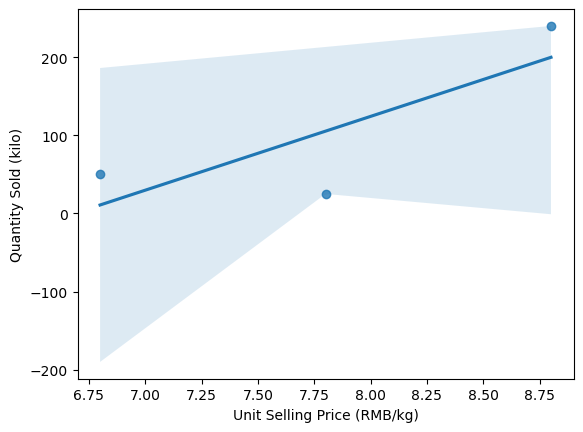

In [1587]:
sns.regplot(df_grouped[df_grouped['Event']=='None'],y='Quantity Sold (kilo)',x='Unit Selling Price (RMB/kg)')


In [1588]:
sorted(df_grouped['Unit Selling Price (RMB/kg)'].unique())

[6.8, 7.8, 8.8, 8.9]

In [1589]:
df_grouped['Event'].unique()

array(['Lunar New Year', 'None'], dtype=object)

In [1590]:
from pygam import ExpectileGAM, s, f
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from itertools import product

# Prepare your data
X_price = df_grouped[['Unit Selling Price (RMB/kg)']].values
X_event = df_grouped['Event'].values

# Encode categorical events
event_encoder = LabelEncoder()
X_event_encoded = event_encoder.fit_transform(X_event).reshape(-1, 1)

# Combine features
X = np.column_stack([X_price, X_event_encoded])
y_raw = df_grouped['Quantity Sold (kilo)'].values
y = np.log1p(y_raw)  # Log-transform target

# Define parameter grid for grid search
param_grid = {
    'lam': [0.1, 1, 100],
    'n_splines': [10, 20, 30],
    'expectile': [0.25, 0.5, 0.75]
}

# Custom scoring function for expectile regression
def expectile_score(y_true, y_pred, expectile):
    residuals = y_true - y_pred
    return np.mean(np.where(residuals >= 0, 
                         expectile * residuals, 
                         (expectile - 1) * residuals))

# K-Fold cross-validation
def grid_search_cv(X, y, param_grid, n_splits=5):
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    best_params = {}
    
    for expectile in param_grid['expectile']:
        print(f"\nGrid searching for expectile: {expectile}")
        best_score = np.inf
        current_best_params = None
        
        for lam, n_splines in product(param_grid['lam'], param_grid['n_splines']):
            scores = []
            
            for train_idx, val_idx in cv.split(X):
                X_train, X_val = X[train_idx], X[val_idx]
                y_train, y_val = y[train_idx], y[val_idx]
                
                # Create GAM with both spline and factor terms
                gam = ExpectileGAM(
                    s(0, n_splines=n_splines) + f(1),  # s(0) for price, f(1) for event
                    lam=lam,
                    expectile=expectile
                )
                gam.fit(X_train, y_train)
                
                y_pred = gam.predict(X_val)
                score = expectile_score(y_val, y_pred, expectile)
                scores.append(score)
            
            mean_score = np.mean(scores)
            print(f"lam: {lam}, n_splines: {n_splines} - Score: {mean_score:.4f}")
            
            if mean_score < best_score:
                best_score = mean_score
                current_best_params = {'lam': lam, 'n_splines': n_splines}
        
        best_params[expectile] = current_best_params
        print(f"Best params for expectile {expectile}: {current_best_params}")
    
    return best_params

# Run grid search
best_params = grid_search_cv(X, y, param_grid)

# Fit final models with best parameters
final_gam_results = {}
for expectile in best_params.keys():
    params = best_params[expectile]
    gam = ExpectileGAM(
        s(0, n_splines=params['n_splines']) + f(1),  # Price + Event
        lam=params['lam'],
        expectile=expectile
    )
    gam.fit(X, y)
    
    # Predict and inverse transform
    y_pred_log = gam.predict(X)
    y_pred = np.expm1(y_pred_log)
    final_gam_results[f'pred_{expectile}'] = y_pred

# Create final dataframe
prediction_gam_df = pd.concat(
    [df_grouped, pd.DataFrame(final_gam_results, index=df_grouped.index)],
    axis=1
)[[
    'Unit Selling Price (RMB/kg)', 'Item Name', 'Category Name', 'Event', 'Wholesale Price (RMB/kg)',
    'pred_0.25', 'pred_0.5', 'pred_0.75'
]]

# Enforce monotonicity
def enforce_monotonicity(row):
    preds = sorted([row['pred_0.25'], row['pred_0.5'], row['pred_0.75']])
    row['pred_0.25'], row['pred_0.5'], row['pred_0.75'] = preds
    return row

prediction_gam_df = prediction_gam_df.apply(enforce_monotonicity, axis=1)

# Add model objects to results
final_models = {
    expectile: ExpectileGAM(
        s(0, n_splines=best_params[expectile]['n_splines']) + f(1),
        lam=best_params[expectile]['lam'],
        expectile=expectile
    ).fit(X, y)
    for expectile in best_params.keys()
}

# Calculate event effects
event_levels = event_encoder.classes_
event_effects = {
    event: {
        'effect': np.expm1(final_models[0.5].partial_dependence(term=1, X=np.array([[0, i]]))[0]),
        'encoded_value': i
    }
    for i, event in enumerate(event_levels)
}

print("\nEvent Effects Analysis (Median Expectile):")
for event, effect_info in event_effects.items():
    print(f"{event}: {effect_info['effect']:.2f} kg uplift")

print("\nBest parameters found:")
print(best_params)
prediction_gam_df.head()


Grid searching for expectile: 0.25
lam: 0.1, n_splines: 10 - Score: 0.3568
lam: 0.1, n_splines: 20 - Score: 0.3385
lam: 0.1, n_splines: 30 - Score: 0.4432
lam: 1, n_splines: 10 - Score: 1.0372
lam: 1, n_splines: 20 - Score: 1.0511
lam: 1, n_splines: 30 - Score: 1.0517
lam: 100, n_splines: 10 - Score: 1.0528
lam: 100, n_splines: 20 - Score: 1.0528
lam: 100, n_splines: 30 - Score: 1.0528
Best params for expectile 0.25: {'lam': 0.1, 'n_splines': 20}

Grid searching for expectile: 0.5
lam: 0.1, n_splines: 10 - Score: 0.4445
lam: 0.1, n_splines: 20 - Score: 0.4251
lam: 0.1, n_splines: 30 - Score: 0.4629
lam: 1, n_splines: 10 - Score: 1.9443
lam: 1, n_splines: 20 - Score: 2.0970
lam: 1, n_splines: 30 - Score: 2.1002
lam: 100, n_splines: 10 - Score: 2.1054
lam: 100, n_splines: 20 - Score: 2.1056
lam: 100, n_splines: 30 - Score: 2.1056
Best params for expectile 0.5: {'lam': 0.1, 'n_splines': 20}

Grid searching for expectile: 0.75
did not converge
lam: 0.1, n_splines: 10 - Score: 0.5705
did n

,Unit Selling Price (RMB/kg),Item Name,Category Name,Event,Wholesale Price (RMB/kg),pred_0.25,pred_0.5,pred_0.75
0,8.8,The White Mushroom (Bag),Edible Mushroom,Lunar New Year,6.055840,44.865712,72.531036,103.942746
1,8.9,The White Mushroom (Bag),Edible Mushroom,Lunar New Year,4.807879,47.485177,57.404174,65.773005
2,6.8,The White Mushroom (Bag),Edible Mushroom,None,4.155490,33.609278,52.955265,64.857414
3,7.8,The White Mushroom (Bag),Edible Mushroom,None,4.178400,41.365919,52.006582,64.027992
4,8.8,The White Mushroom (Bag),Edible Mushroom,None,5.395875,49.823807,87.079384,144.798572


In [1591]:
prediction_gam_df.merge(df_grouped[['Event','Unit Selling Price (RMB/kg)','Quantity Sold (kilo)']],on=['Event','Unit Selling Price (RMB/kg)']).rename(columns={'Quantity Sold (kilo)':'Real Quantity'})

,Unit Selling Price (RMB/kg),Item Name,Category Name,Event,Wholesale Price (RMB/kg),pred_0.25,pred_0.5,pred_0.75,Real Quantity
0,8.8,The White Mushroom (Bag),Edible Mushroom,Lunar New Year,6.055840,44.865712,72.531036,103.942746,125.0
1,8.9,The White Mushroom (Bag),Edible Mushroom,Lunar New Year,4.807879,47.485177,57.404174,65.773005,33.0
2,6.8,The White Mushroom (Bag),Edible Mushroom,None,4.155490,33.609278,52.955265,64.857414,51.0
3,7.8,The White Mushroom (Bag),Edible Mushroom,None,4.178400,41.365919,52.006582,64.027992,25.0
4,8.8,The White Mushroom (Bag),Edible Mushroom,None,5.395875,49.823807,87.079384,144.798572,240.0


In [1597]:
import plotly.graph_objects as go
import plotly.express as px

event = input(f"Which event you want to see? {df_grouped['Event'].unique()}")

df_view = prediction_gam_df[prediction_gam_df['Event']==event].copy()

# Calculate predicted sales value = predicted quantity × price
df_view["y_median"] = df_view["pred_0.5"] * (df_view["Unit Selling Price (RMB/kg)"]-(df_view["Wholesale Price (RMB/kg)"]/(1-loss_rate_selected)))
df_view["y_upper"] = df_view["pred_0.75"] * (df_view["Unit Selling Price (RMB/kg)"]-(df_view["Wholesale Price (RMB/kg)"]/(1-loss_rate_selected)))
df_view["y_lower"] = df_view["pred_0.25"] * (df_view["Unit Selling Price (RMB/kg)"]-(df_view["Wholesale Price (RMB/kg)"]/(1-loss_rate_selected)))

df_view.sort_values(by="Unit Selling Price (RMB/kg)", inplace=True)

# Convert colors to rgba
def hex_rgba(hex, transparency):
    col_hex = hex.lstrip('#')
    col_rgb = list(int(col_hex[i:i+2], 16) for i in (0, 2, 4))
    return f'rgba({col_rgb[0]},{col_rgb[1]},{col_rgb[2]},{transparency})'

colors = px.colors.qualitative.Plotly
fill_color = hex_rgba(colors[0], 0.2)
line_color = hex_rgba(colors[0], 1.0)

# Create figure
fig = go.Figure()

x = df_view["Unit Selling Price (RMB/kg)"]
y_median = df_view["y_median"]
y_upper = df_view["y_upper"]
y_lower = df_view["y_lower"]

# Add shaded quantile area
fig.add_trace(go.Scatter(
    x=pd.concat([x, x[::-1]]),
    y=pd.concat([y_upper, y_lower[::-1]]),
    fill='toself',
    fillcolor=fill_color,
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='25-75th Percentile'
))

# Add median prediction line
fig.add_trace(go.Scatter(
    x=x,
    y=y_median,
    mode='lines',
    line=dict(color=line_color, width=3),
    name='Median Prediction'
))

# Get max points
max_median = df_view.loc[df_view['y_median'].idxmax()]
max_upper = df_view.loc[df_view['y_upper'].idxmax()]
max_lower = df_view.loc[df_view['y_lower'].idxmax()]

if len(year) > 1 :
    titles = f"Predicted Adjusted Profit vs Unit Price of {df_grouped['Item Name'].unique()[0]} Event : {', '.join(event)} in {sorted(year)[0]} - {sorted(year)[-1]}"
else :
    titles = f"Predicted Adjusted Profit vs Unit Price of {df_grouped['Item Name'].unique()[0]} Event : {event} in {sorted(year)[0]}"


# Update layout
fig.update_layout(
    title=titles,
    xaxis_title="Unit Selling Price (RMB/kg)",
    yaxis_title="Predicted Adjusted Profit",
    template="plotly_dark"
)

# Add markers for 0.25 quantile predictions
fig.add_trace(go.Scatter(
    x=df_view["Unit Selling Price (RMB/kg)"],
    y=df_view['y_lower'],
    mode='markers',
    marker=dict(color='grey', size=6),
    name='0.25 Quantile'
))

# Add markers for 0.5 (median) quantile predictions
fig.add_trace(go.Scatter(
    x=df_view["Unit Selling Price (RMB/kg)"],
    y=df_view['y_median'],
    mode='markers',
    marker=dict(color='grey', size=6),
    name='0.5 Quantile (Median)'
))

# Add markers for 0.75 quantile predictions
fig.add_trace(go.Scatter(
    x=df_view["Unit Selling Price (RMB/kg)"],
    y=df_view['y_upper'],
    mode='markers',
    marker=dict(color='grey', size=6),
    name='0.75 Quantile'
))

# Add markers for highest values
fig.add_trace(go.Scatter(
    x=[max_median['Unit Selling Price (RMB/kg)']],
    y=[max_median['y_median']],
    mode='markers+text',
    marker=dict(color='blue', size=10, symbol='circle'),
    text=[f"¥{round(max_median['y_median']):,}"],
    textposition="top center",
    name='Max Median'
))

fig.add_trace(go.Scatter(
    x=[max_upper['Unit Selling Price (RMB/kg)']],
    y=[max_upper['y_upper']],
    mode='markers+text',
    marker=dict(color='green', size=10, symbol='diamond'),
    text=[f"¥{round(max_upper['y_upper']):,}"],
    textposition="top center",
    name='Max Upper'
))

fig.add_trace(go.Scatter(
    x=[max_lower['Unit Selling Price (RMB/kg)']],
    y=[max_lower['y_lower']],
    mode='markers+text',
    marker=dict(color='red', size=10, symbol='square'),
    text=[f"¥{round(max_lower['y_lower']):,}"],
    textposition="bottom center",
    name='Max Lower'
))
fig.show()
## add scatter plot